Measured Throughput Plot

Text(0.5, 1.0, 'With Interference')

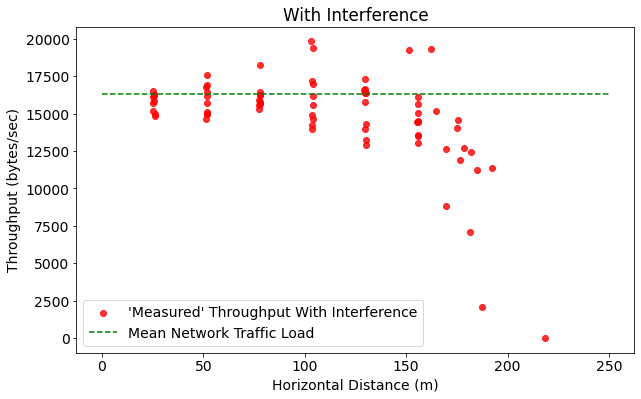

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSVs
measured_df = pd.read_csv("/media/research-student/One Touch/FANET Datasets/Anomaly_Moving/Base_Case_Repeat/Base_Case_Repeat_timeSlot1s_Downlink_Throughput.csv")
# simulated_df = pd.read_csv("C:/Users/Reuben/LocalPCStuff/FANET_Dataset/Anomaly_Study/Anomaly_Moving/Base_Case_Static_QAM16_ConstantPktSI/Base_Case_Static_QAM16_Constant_PktSI_Downlink_MeanThroughput.csv")
anomalous_df = pd.read_csv("/media/research-student/One Touch/FANET Datasets/Anomaly_Moving/QAM16_4UAVI_Moderate/QAM16_4UAVI_Moderate_timeSlot1s_Downlink_Throughput.csv")

# Get specific scenario
# measured_df = measured_df.loc[(measured_df["UAV_Speed"] == 26) & (measured_df["UAV_Sending_Interval"] == 1000)]

measured_throughput = np.append(measured_df["Throughput"].values,0)
measured_hdist = np.append(measured_df["Horizontal_Distance"].values, measured_df["Horizontal_Distance"].max()+26)

anomalous_throughput = np.append(anomalous_df["Throughput"].values,0)
anomalous_hdist = np.append(anomalous_df["Horizontal_Distance"].values, anomalous_df["Horizontal_Distance"].max()+26)

# simulated_throughput = simulated_df["MeanThroughput"].values[0:14]
# simulated_throughput = [16320 if t > 15937 else t for t in simulated_throughput]
# simulated_hdist = simulated_df["Horizontal_Distance"].values[0:14]

plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
# plt.scatter(measured_hdist, measured_throughput, alpha=0.8)
plt.scatter(anomalous_hdist, anomalous_throughput, c='r', alpha=0.8)
# plt.plot(simulated_hdist, simulated_throughput, '-o', c="tab:orange", linewidth=2)
plt.plot([0, 250], [16320, 16320], '--g')
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Throughput (bytes/sec)")
# plt.legend(["'Measured' Throughput No Interference", "'Measured' Throughput With Interference", "Mean Network Traffic Load"], loc='lower left')
plt.legend(["'Measured' Throughput With Interference", "Mean Network Traffic Load"], loc='lower left')
plt.title("With Interference")


In [14]:
measured_df.iloc[47:56]

,Horizontal_Distance,Throughput,Height,UAV_Sending_Interval,Modulation,UAV_Speed


Reliability vs Distance

Text(0.5, 1.0, 'UAV Sending Interval: 10 ms')

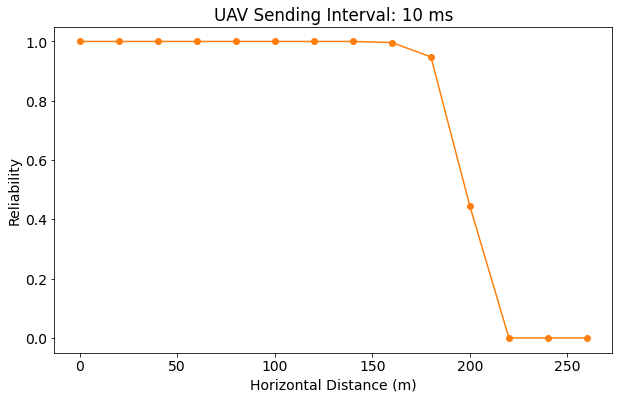

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

reliability_df = pd.read_csv("/media/research-student/One Touch/FANET Datasets/Anomaly_Moving/Base_Case_Static_QAM16/Base_Case_Static_QAM16_Downlink_Reliability.csv")
reliability_df = reliability_df.loc[(reliability_df["UAV_Sending_Interval"] == 10)]
reliability_df["Reliability"] = reliability_df["Num_Reliable"] / reliability_df["Num_Sent"]
reliability = reliability_df["Reliability"].values[0:14]
hdist = reliability_df["Horizontal_Distance"].values[0:14]

plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.plot(hdist, reliability, '-o', c="tab:orange")
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Reliability")
plt.title("UAV Sending Interval: 10 ms")

Speed vs Time

Text(0.5, 1.0, 'UAV Speed vs Time')

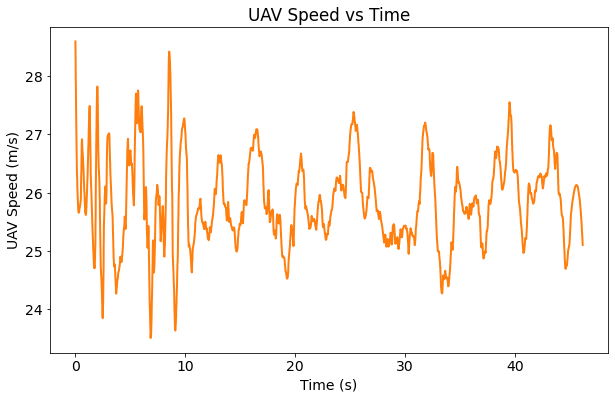

In [34]:
from scipy import signal
mobility_df = pd.read_csv("/media/research-student/One Touch/FANET Datasets/Anomaly_Moving/Base_Case_QAM16_GaussMarkov/data-speed26/UAVSwarmMobility.csv")
mobility_df.drop_duplicates(inplace=True)
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.plot(mobility_df["Time"], signal.savgol_filter(mobility_df["SpeedX"], 10000, 3), c="tab:orange", linewidth=2)
# plt.plot(mobility_df["Time"].values[0::20000], mobility_df["X"].values[0::20000]-500, '-o', c="tab:orange", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("UAV Speed (m/s)")
plt.title("UAV Speed vs Time")

Packet Drop vs Distance

Text(0.5, 1.0, 'UAV Speed: 26 m/s, Gauss Markov Mobility')

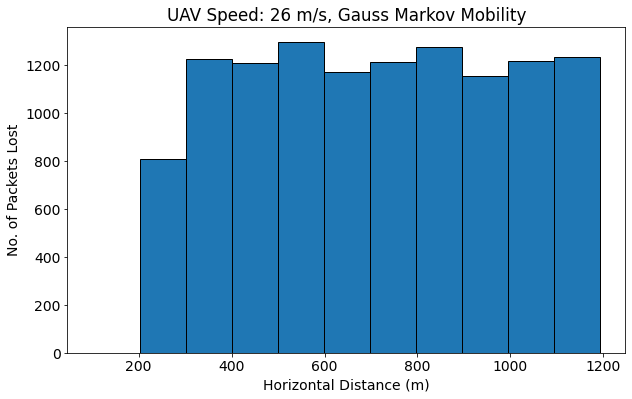

In [56]:
import glob, os
uav_speed = 26
sim_root_path = "/media/research-student/One Touch/FANET Datasets/Anomaly_Moving/Base_Case_QAM16_GaussMarkov/data-speed26"
scenario = "NumMember-7_UAVSpeed-26_Height-60_HDistRange-1200_Modulation-QAM-16_UAVSendingInterval-20"
scenario_files = glob.glob(sim_root_path + "/{}_*.csv".format(scenario))
gcs_pd_file = [file for file in scenario_files if (('_GCS-PacketDrop' in file))]
gw_rx_file = [file for file in scenario_files if (('_GW-Rx' in file))]
gw_pd_file = [file for file in scenario_files if (('_GW-PacketDrop' in file))]
uav_pd_files = [file for file in scenario_files if (('_UAV-PacketDrop' in file))]
uav_rx_files = [file for file in scenario_files if (('_UAV-Rx' in file))]
gw_pd_df = pd.read_csv(gw_pd_file[0])
gw_rx_df = pd.read_csv(gw_rx_file[0])
gcs_pd_df = pd.read_csv(gcs_pd_file[0])
uavs_pd_df_list = []
for uav_pd_file in uav_pd_files:
    uavs_pd_df_list.append(pd.read_csv(uav_pd_file))
uavs_rx_df_list = []
for uav_rx_file in uav_rx_files:
    uavs_rx_df_list.append(pd.read_csv(uav_rx_file))

rx_df = pd.concat([gw_rx_df]+uavs_rx_df_list)
rx_df["Delay"] = rx_df["RxTime"] - rx_df["TxTime"]
delay_excd_df = rx_df.loc[rx_df["Delay"]>0.04].copy()
pd_df = pd.concat([delay_excd_df, gcs_pd_df])
# pd_df["Horizontal_Distance"] = pd_df["RxTime"] * uav_speed
# For Gauss Markov Mobility, UNCOMMENT Below ------------
mobility_df = pd.read_csv(os.path.join(sim_root_path, "UAVSwarmMobility.csv"))
pd_df["Horizontal_Distance"] = np.interp(pd_df['RxTime'], mobility_df["Time"], mobility_df["X"]-500)
# For Gauss Markov Mobility, UNCOMMENT Above ------------
counts, bins = np.histogram(pd_df["Horizontal_Distance"])
counts = np.insert(counts, 0, 0)
bins = np.insert(bins, 0, bins[0]/2)

plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.hist(bins[:-1], bins, weights=counts, edgecolor='black')
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("No. of Packets Lost")
plt.title("UAV Speed: 26 m/s, Gauss Markov Mobility")

## Measured Throughput Dataset Explore

Text(0.5, 1.0, 'Measured Throughput Time Window Length: 5 sec')

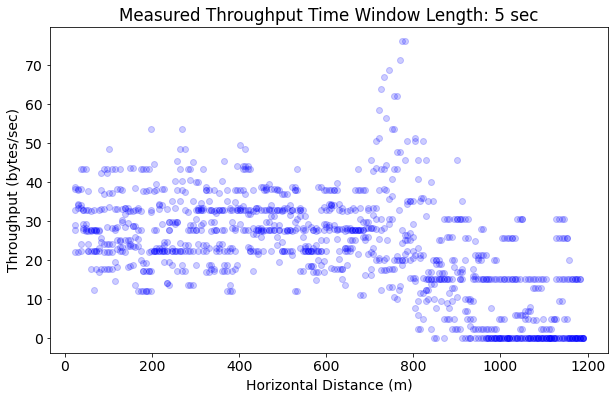

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the CSVs
data_path = "/media/research-student/One Touch/FANET Datasets/DJISpark_Measured_Throughput_10000Samples/data_test_processed_dl-5secWinSize1secStride_ul-1secWinSize100msecStride/"
scenario = "UAVSpeed-6_BitRate-13_Height-270_Distance-1200_Modulation-QPSK_UAVSendingInterval-1000"
link = "Gateway_Downlink"
measured_df = pd.read_csv(os.path.join(data_path, scenario, link + "_Throughput.csv"))

# measured_df = measured_df.loc[measured_df["Horizontal_Distance"] < 650]

plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.scatter(measured_df["Horizontal_Distance"], measured_df["Throughput"], c="b", alpha=0.2)
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Throughput (bytes/sec)")
plt.title("Measured Throughput Time Window Length: 5 sec")

# plt.figure(figsize=(10,6))
# plt.rcParams.update({'font.size': 14})
# plt.scatter(measured_df["Horizontal_Distance"], measured_df["Measured_Reliability"], c="tab:orange", alpha=0.5)
# plt.xlabel("Horizontal Distance (m)")
# plt.ylabel("Measured Reliability")

Text(0, 0.5, 'Throughput (bytes/sec)')

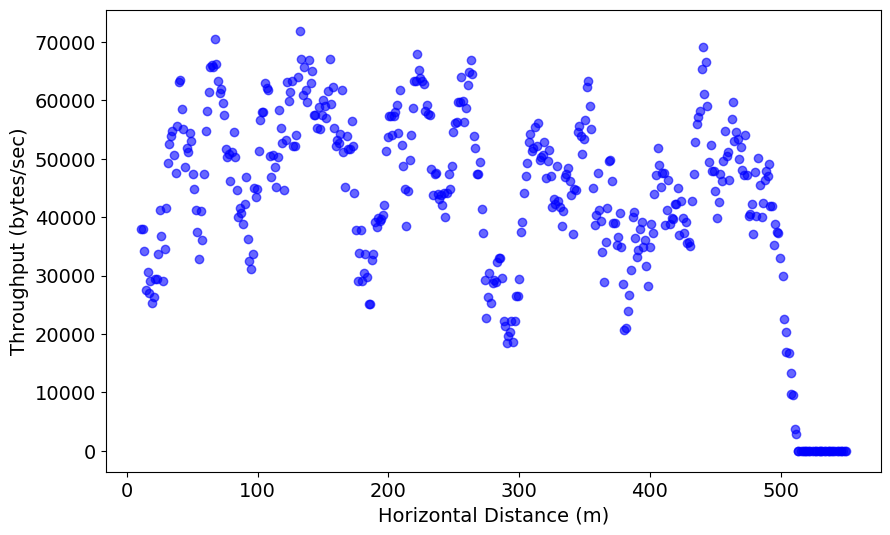

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the CSVs
data_path = "/media/research-student/One Touch/FANET Datasets/DJISpark_Measured_Throughput_10000Samples/data_temp_plot_processed/"
scenario = "UAVSpeed-12_BitRate-13_Height-270_Distance-1200_Modulation-QPSK_UAVSendingInterval-100"
link = "Uplink"
measured_df = pd.read_csv(os.path.join(data_path, scenario, link + "_Throughput.csv"))

measured_df = measured_df.loc[measured_df["Horizontal_Distance"] < 550]

plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
plt.scatter(measured_df["Horizontal_Distance"], measured_df["Throughput"], c="b", alpha=0.6)
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Throughput (bytes/sec)")